# Funciones de apoyo

## Imprimir Histogramas

In [1]:
imprimir_histograma<-function(serie=x,leyenda="topleft"){
    hist(serie,breaks=100,freq=FALSE,main="Histograma")                                      #imprime el histograma 
    datos_normales<-rnorm(1000000,mean = mean(serie),sd=sqrt(var(serie)))                    #propone una serie normal
    curve(dnorm(x,mean(datos_normales),sd(datos_normales)),col="blue",lty=2,lwd=3,add=TRUE)  #dibuja una campana normal
    d<-density(serie)                                                                        #Densidad no parametrica
    lines(d,col="red",lwd=2)                                                                 #Dibuja una densidad no parametrica
    
    legend(leyenda,c("Distribución no parametrica","Distribución normal"),col=c("red","blue"),lwd=c(3,3),bty="n") #Leyenda
}

## Aplicar transformaciones

In [2]:
aplicar_transformacion<-function(serie=x,tipo=1,retardo=1){ #la serie por defecto será x,
                                                  ##El tipo 1 (por defecto) hará referencia a la diferenciacion de los datos (Cambio Absoluto)
                                                  ###El tipo 2 hará referencia a la transformacion Pt/Pt-1 (Rentabilidad bruta simple)
                                                  ####El tipo 3 hara referencia a la tranformacion Pt/Pt-1 -1 (Rentabilidad neta simple)
                                                  #####El tipo 4 hara referencia la transformacion log(Pt/Pt-1) Rentabilidad logaritmica
                                                  ######El tipo 5 hara referencia a la transformacion raiz cuadrada
                                                  #######El tipo 6 hara referencia  a la transformacion raiz cubica
                                                  ########El tipo 7 hara referenica a la transformacion ln(Pt)
    if(tipo==1){
        transformada<-diff(serie,retardo)
    }
    if(tipo==2){
        transformada<-c(NaN,serie[2:length(serie)]/serie[1:length(serie)-1])
    }
    
    if(tipo==3){
        transformada<-c(NaN,(serie[2:length(serie)]/serie[1:length(serie)-1])-1)
    }
    
    if(tipo==4){
        transformada<-c(NaN,log(serie[2:length(serie)]/serie[1:length(serie)-1]))
    }
    
    if(tipo==5){
        transformada<-sqrt(serie)
    }
    
    if(tipo==6){
        transformada<-(serie)^(1/3)
    }
    
    if(tipo==7){
        transformada<-log(serie)
    }
    return(transformada)
}



## Estadisticos Básicos

In [3]:
estadisticos_basicos<-function(serie=x,num_dec=6){ #informa los estadisticos descriptivos básicos de una serie, 
                                                   #se pueden configurar los decimales!!
    #library(moments)
    media<-round(mean(serie),num_dec)
    varianza<-round(var(serie),num_dec)
    asimetria<-round(skewness(serie),num_dec)
    curtosis<-round(kurtosis(serie),num_dec)
    total_datos<-length(serie)
    minimo<-round(min(serie),num_dec)
    maximo<-round(max(serie),num_dec)

    estadisticos<-c(media=media,varianza=varianza,asimetria=asimetria,curtosis=curtosis,minimo=minimo,maximo=maximo,total_datos=total_datos)
    return(estadisticos)
}

# Graficas QQ-Plot

In [4]:
grafico_qqplot<-function(serie=x){
    qqnorm(serie, main="Gráfico Q-Q")
    qqline(serie)
}

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


# Modelo univariado para el pronostico de la electricidad en Colombia

A continuacion se presenta la serie de tiempo correspondiente a los precios promedios aritmeticos en valores corrientes y valores constantes con una resolucion diaria.

En adelante, se continuará trabajando con la serie de tiempo constante pues cuenta con la corrección de la inflacion a precios del 2008

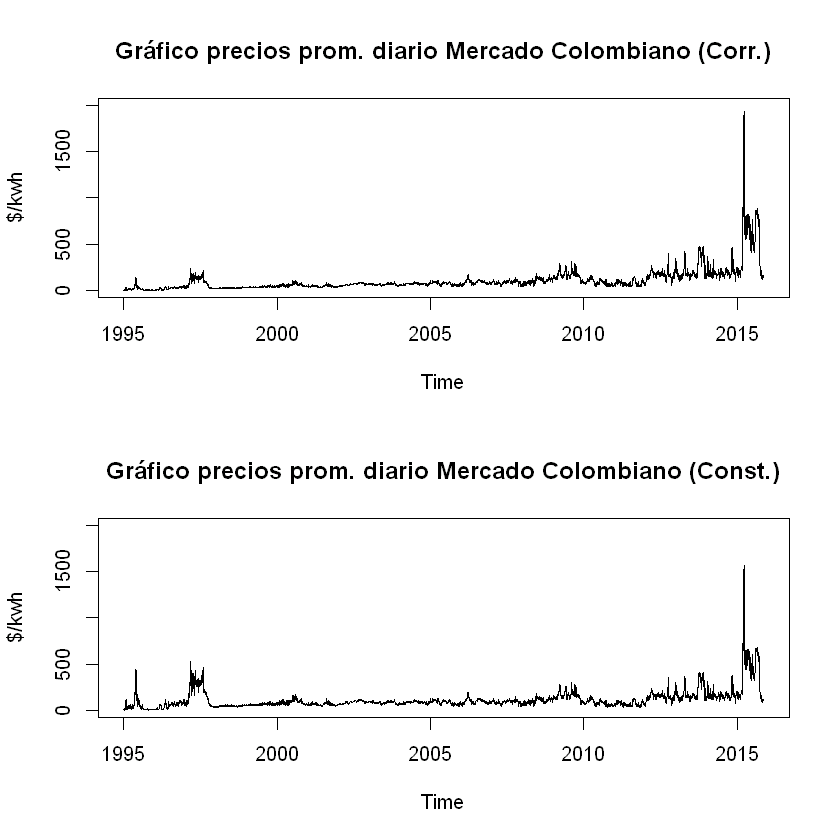

In [62]:
datos<-read.table("Precios_1995.csv",sep=",",header = TRUE) #cargo la serie de datos

current_price<-datos$Promedio_Aritmetico_...kWh._Corriente 
current_price<-ts(current_price,frequency = 365,start=c(1995,1)) #construyo la serie corriente


constant_price<-datos$X..KWh_Const_Dic_2008
constant_price<-ts(constant_price,frequency = 365,start=c(1995,1)) #construyo la serie constante

par(mfrow=c(2,1))

plot.ts(current_price,
        main="Gráfico precios prom. diario Mercado Colombiano (Corr.)",
        ylab="$/kwh",lwd=1,col="black",ylim=c(0,2000))
plot.ts(constant_price,
        main="Gráfico precios prom. diario Mercado Colombiano (Const.)",
        ylab="$/kwh",lwd=1,col="black",ylim=c(0,2000))


In [63]:
current_price

Time Series:
Start = c(1995, 1) 
End = c(2015, 322) 
Frequency = 365 
   [1]    1.4094    4.9243    1.2695    0.9531    4.3059    1.1492    1.1086
   [8]    0.5860    0.4998    0.9277    0.6695    0.6795    1.1069    1.0775
  [15]    1.5179    1.7860    2.3838    2.3876    3.7072    6.6500   13.9920
  [22]   20.0417   21.1917   30.7108   34.3278   33.1903   14.5133    8.6643
  [29]    1.8133    1.9417    1.1018    2.0680    1.4168    0.8993    1.2361
  [36]    1.4048    1.5460    1.1338    1.0745    1.4642    1.8040    1.8086
  [43]    1.7189    1.7590    3.3833    2.2458   10.1685   12.1042   15.2500
  [50]   15.2083   15.3917   14.9708   14.9333   15.0515   11.7268   12.9883
  [57]   11.7033   11.4768    8.5173    5.4210    8.4549   11.0932   14.2500
  [64]   11.5188   11.9354   10.7177    6.1573   10.8964   11.8685   11.7222
  [71]   11.4516   11.4753   14.8333    6.5636   11.8810   12.4092   13.5603
  [78]   15.2208   15.3958   16.5833   16.2708   19.3333   17.2065   18.2871
  [85]

### En adelante, continuaremos trabajando con la serie de precios constantes y separaremos una ventana para ajuste y una muestra para comparar los pronosticos resultantes

In [64]:
y.fit<-window(constant_price,start=c(1995,1),end=c(2013,1))
y.for<-window(constant_price,start=c(2013,1))

El procedimiento Box-Jenkins consiste en tres etapas:

* Identificacion
* Estimacion
* Diagnostico

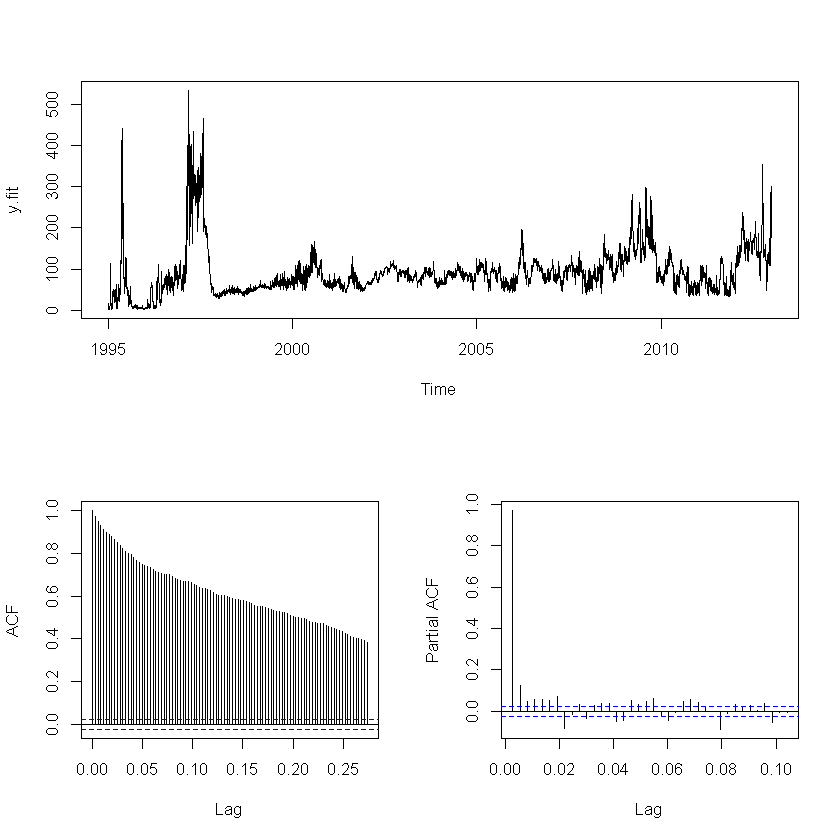

In [65]:
op<-par(no.readonly=TRUE) #configura la impresion
layout(matrix(c(1,1,2,3),2,2,byrow = TRUE)) #configura la impresion
plot.ts(y.fit)#se hace una inspeccion visual de la serie para determinar si es estacionaria
acf(y.fit,main="",lag.max = 100)
pacf(y.fit,main="")

Se percibe que la serie tiene un comportamiento en el que esta arrastrando informacion de los rezagos anteriores, esto es conocido como Raices unitarias.

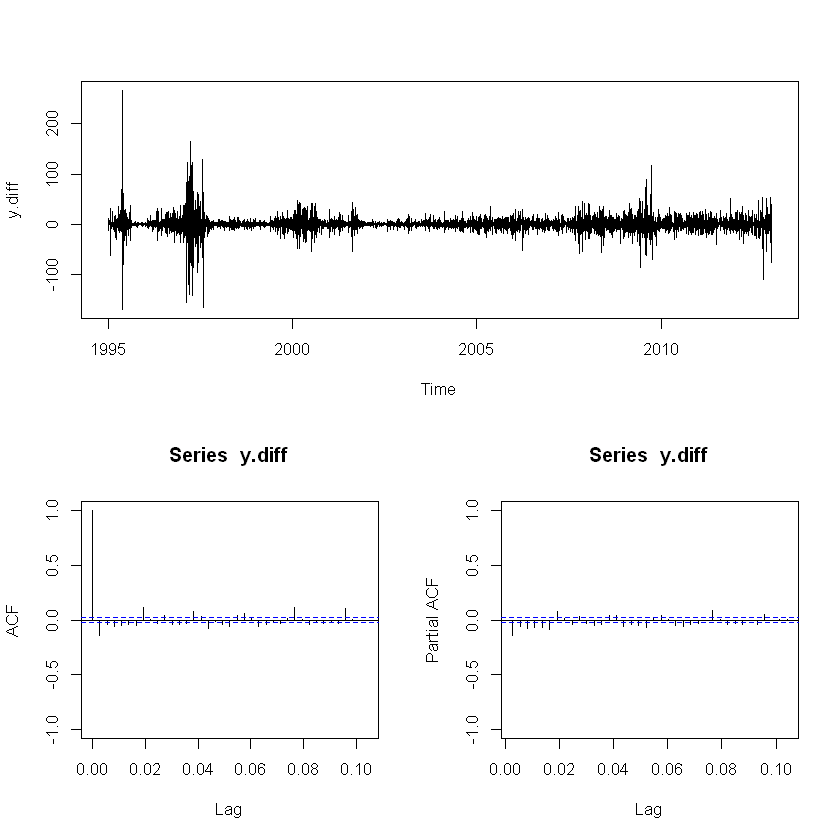

In [33]:
y.diff<-diff(y.fit)

op<-par(no.readonly=TRUE) #configura la impresion
layout(matrix(c(1,1,2,3),2,2,byrow = TRUE)) #configura la impresion

plot.ts(y.diff)
acf(y.diff,ylim=c(-1,1))
pacf(y.diff,ylim=c(-1,1))

# Probemos diferenciando la serie de manera estacional

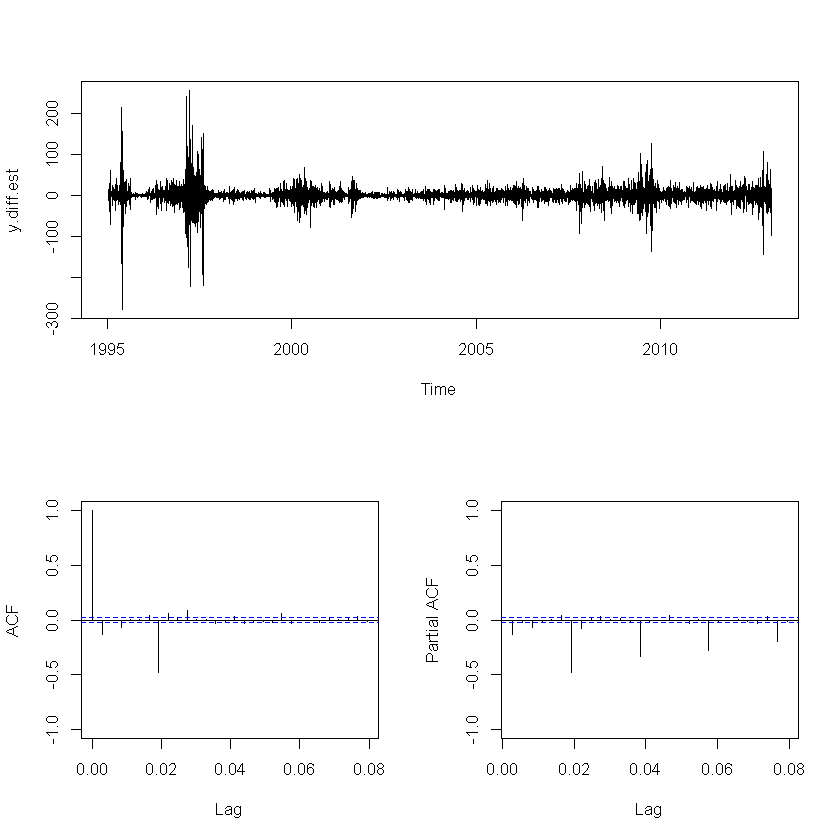

In [41]:
y.diff.est<-diff(y.diff,lag=7)
op<-par(no.readonly=TRUE) #configura la impresion
layout(matrix(c(1,1,2,3),2,2,byrow = TRUE)) #configura la impresion

plot.ts(y.diff.est)

acf(y.diff.est,ylim=c(-1,1),main="",lag.max = 29)
pacf(y.diff.est,ylim=c(-1,1),main="",lag.max = 29)

In [14]:
mod3<-auto.arima(y.fit,max.p=29,max.q=29,max.P=29,max.Q=29,max.D=2,max.d=2)

In [27]:
cbind(mod3$arma[1],mod3$arma[6],mod3$arma[2])
mod3$arma
#?auto.arima

arimaorder(mod3)

3,1,6


[1]   3   6   0   0 365   1   0

[1] 3 1 6

In [15]:
mod3
r3<-mod3$residuals

Series: y.fit 
ARIMA(3,1,6)                    

Coefficients:
          ar1      ar2      ar3     ma1     ma2     ma3      ma4      ma5
      -0.9742  -1.2142  -0.5228  0.8152  1.0096  0.1930  -0.2773  -0.1718
s.e.   0.1430   0.0650   0.1405  0.1429  0.0449  0.1214   0.0394   0.0192
          ma6
      -0.1224
s.e.   0.0153

sigma^2 estimated as 185.4:  log likelihood=-26475.04
AIC=52970.08   AICc=52970.12   BIC=53037.99

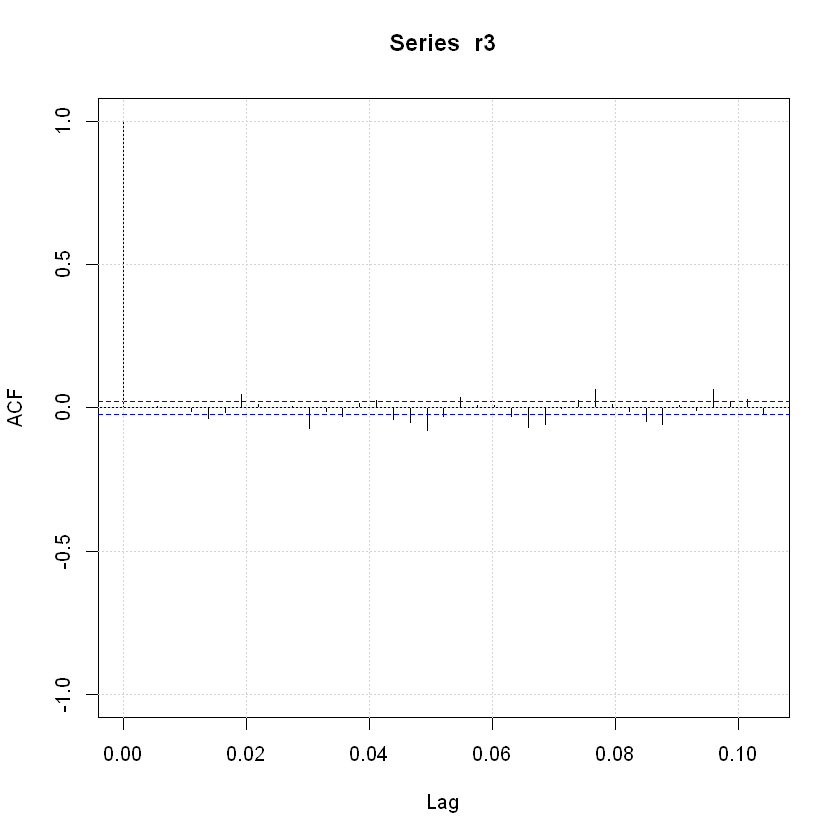

In [16]:
acf(r3, ylim=c(-1,1))
grid()

In [140]:
Box.test(r3,type = "Ljung-Box",lag = 7)


	Box-Ljung test

data:  r3
X-squared = 26.059, df = 7, p-value = 0.0004915


In [ ]:
#pronostico con el modelo que encontramos y tambien miro otras transformaciones y monto la tabla de pronostico

#Prueba de no linealidad en la media
# prueba de terasvirta y otras (Esto me va a decir que se requiere otro modelo distinto para la media)
#Prueba de no linealidad en la varianza
#Prueba de engle (prueba arch)
#redes neuronales, markovianos, bilineales, modelos star

In [119]:
res2<-mod2$residuals
mod2

Series: y.diff.est 
ARIMA(1,0,0) with zero mean     

Coefficients:
          ar1
      -0.1275
s.e.   0.0122

sigma^2 estimated as 343:  log likelihood=-28468.04
AIC=56940.09   AICc=56940.09   BIC=56953.67

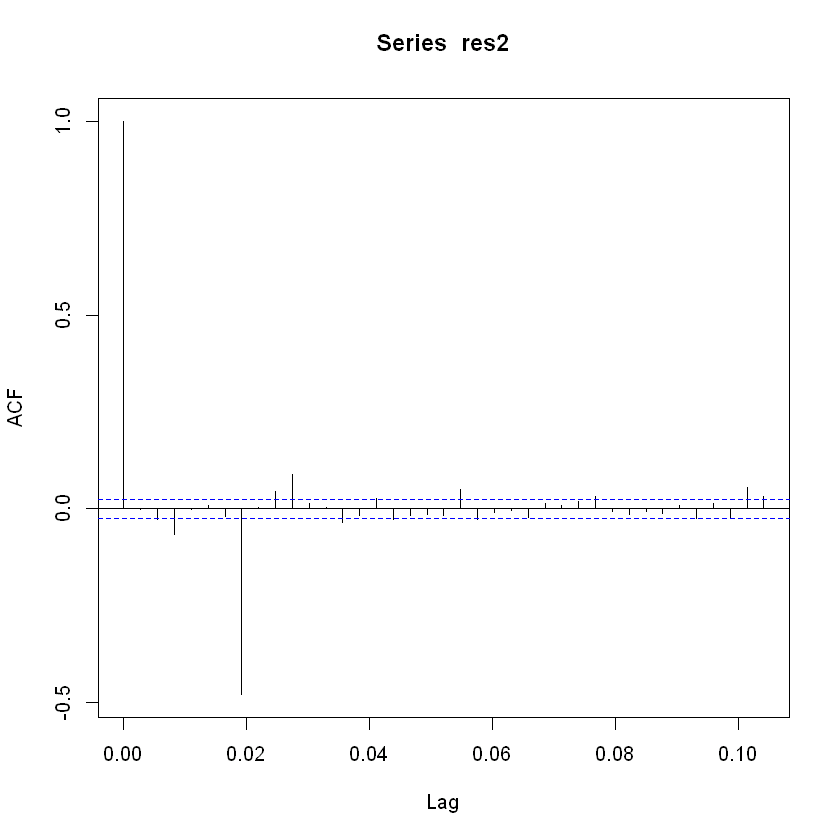

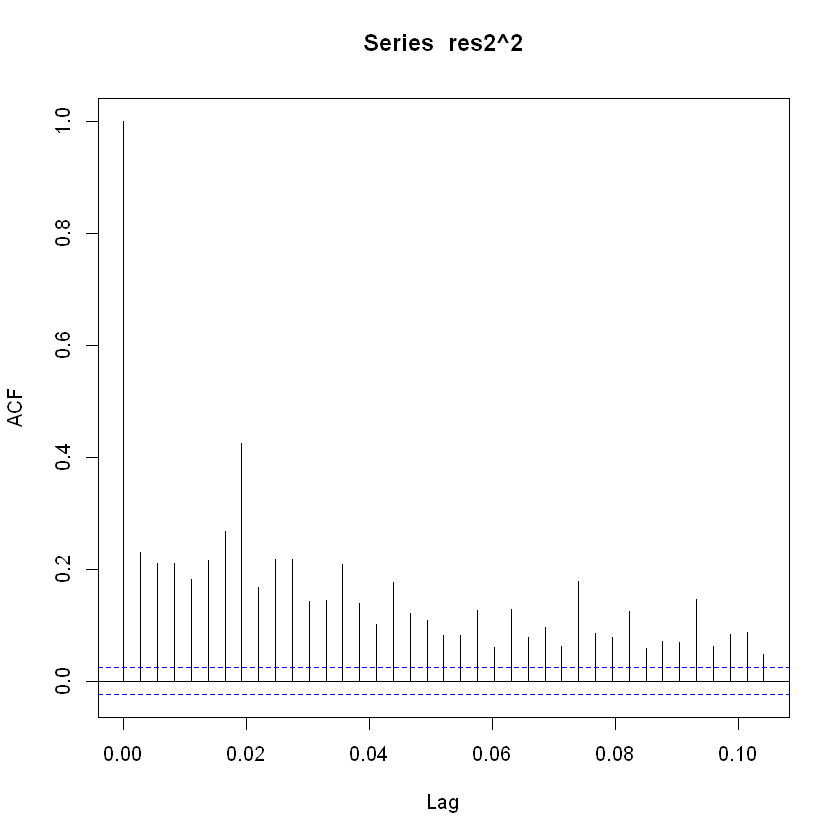

In [120]:
acf(res2)
acf(res2^2)

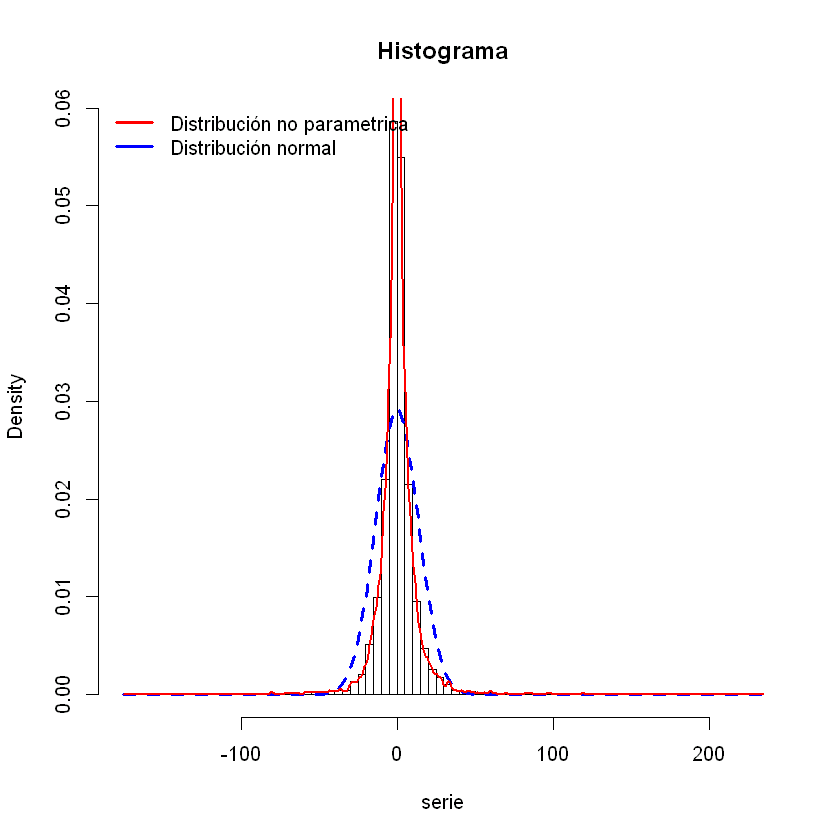

In [114]:
imprimir_histograma(res1)
#imprimir_histograma(res2)

Hay evidencias de comportamiento heterocedastico en los residuos del modelo 1 y modelo 2

# Modelar la heterocedasticidad

In [108]:
library(fGarch)
mod1res1<-garchFit(~garch(1,1),data = res1)


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          6570
 Recursion Init:            mci
 Series Scale:              13.60961

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U            V      params includes
    mu     -0.03447712   0.03447712 0.003447712     TRUE
    omega   0.00000100 100.00000000 0.100000000     TRUE
    alpha1  0.00000001   0.99999999 0.100000000     TRUE
    gamma1 -0.99999999   0.99999999 0.100000000    FALSE
    beta1   0.00000001   0.9999

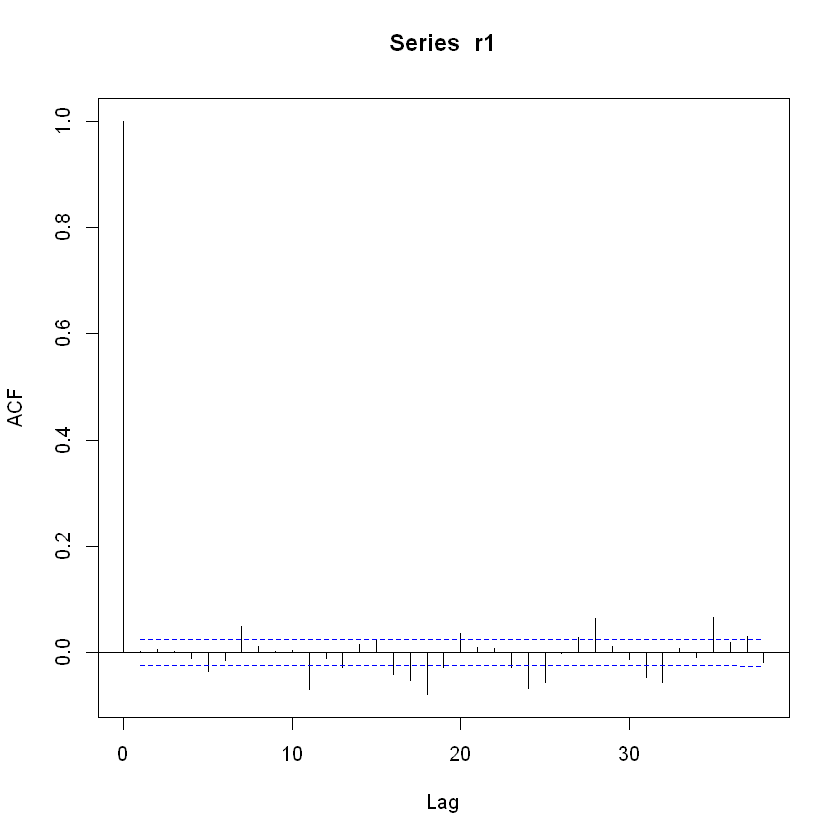

In [111]:
r1<-residuals(mod1res1)
acf(r1,ci.type="ma")

# Transformaciones Box-Cox

En algunos casos, para poder comenzar a realizar estimaciones de modelos, debemos garantizar que los datos siguen una N$\sim(\mu,\sigma^2)$. 

Por esta razon se utilizan transformaciones para garantizar este supuesto:

El objetivo principal de la transformacion es estimar un valor de $\lambda$ para elevar los datos a dicha potencia.

La forma primaria de la transformacion es:

$Y^{(\lambda)}=\frac{y^\lambda-1}{\lambda}, si \lambda<>0$


$Y^{(\lambda)}=\log{y}, si  \lambda=0$

Se puede demostrar mediante L'Hopital que $Lim\frac{y^\lambda-1}{\lambda}=\log{y}$

El paquete de R AID, tiene algunos casos para observar ejemplos

##### library(AID)
boxcoxnc(data=y.fit[1:5000],method = "jb",lam = seq(-3,3,0.01),plotit = FALSE)

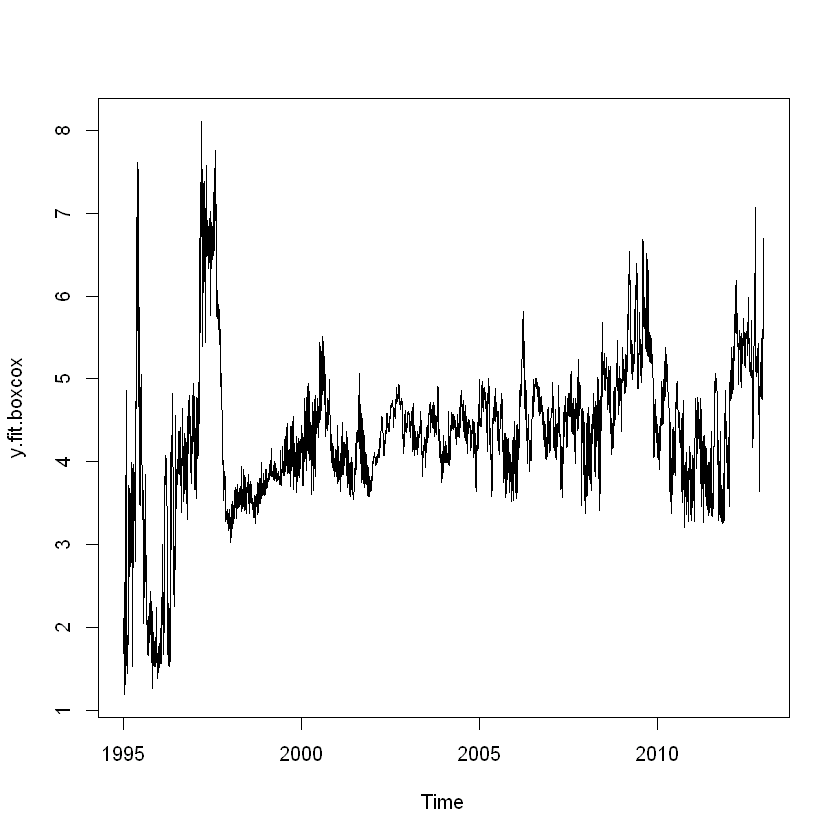

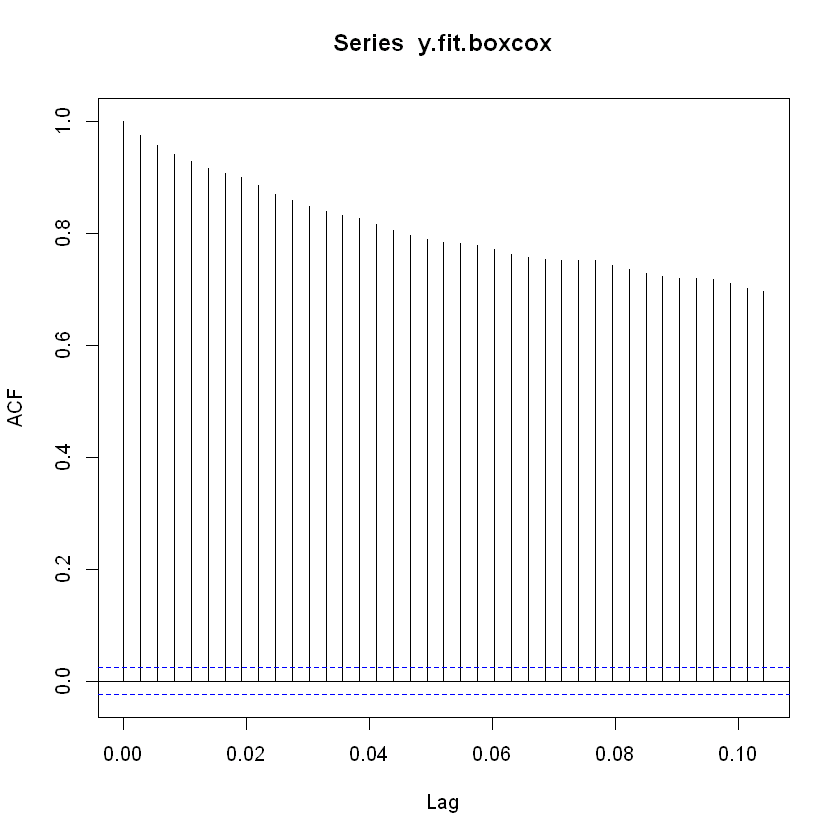

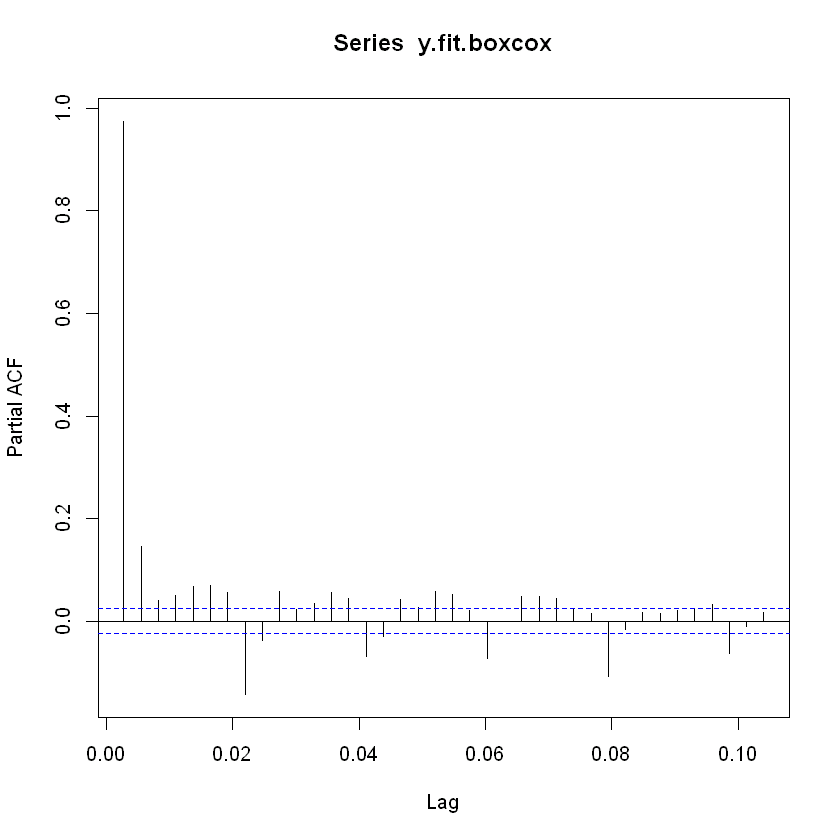

In [67]:
y.fit.boxcox<-y.fit^(1/3)
plot.ts(y.fit.boxcox)
acf(y.fit.boxcox)
pacf(y.fit.boxcox)